Exercises from:
https://ds.codeup.com/stats/hypothesis-testing-overview/
https://ds.codeup.com/stats/compare-means/

For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

##### Has the network latency gone up since we switched internet service providers?

H0: Network latency has not gone up since switching internet service provers, ie the old provider was faster

Ha: The new provider has resulted in network latency going up

Accept H0 and H0 is true (True Negative):
    We accepted that network latency has not gone up and indeed network latency has not gone up with the new provider
    
Accept H0 but H0 is false (False Negative):
    We accepted that network latency has not gone up with the new provider but it actually has

Reject H0 but H0 is true (False positive):
    We rejected that network latency has not gone up with the new provider (ie we accepted that it has gone up with new provider) but actually latency has not gone up with the new provider.
    
Reject H0 and H0 is false (True Positive):
    We rejected that network latency has not gone up with the new provider (ie we accepted that it has gone up with the new provider) and latency has indeed gone up with the new provider

##### Is the website redesign any good?

H0: The old and new website versions are no better than each other, say for attracting traffic or clicks

Ha: The new website version is better than the old, say at attracting traffic/clicks

True Negative (Accept H0 and H0 is True): Accepted that the two versions of the website are no better than each other and that is true

Accept H0 but H0 is false (False negative): Accepted that the two versons are no better from each other but actually the redesign (new version) is better

Reject H0 but H0 is True (False positive): We rejected that the two versions are no better from each other ( so we thought the redesign is better) but actually they are no better from each other

Reject H0 and H0 is False (True positive): We rejected that the two versions are no better from each other (accepted that the redesign is better) and the new version is in fact better

##### Is our television ad driving more sales?

H0: The tv ad has no effect on sales - sales are the same before and after the ad

Ha: The tv ad has caused greater sales - sales are greater after the ad than before

Accept H0 and H0 is True (True negative): Accepted that the tv ad has not had any effect on sales and it hasn't

Accept H0 but H0 is False (False negative): Accepted that the tv ad has not had any effect on sales but it has in fact had an effect

Reject H0 but H0 is True (False positive): We rejected that the tv ad is not causing sales to go up but sales are not actually going up from the ad

Reject H0 and H0 is False (True positive): we rejected that the tv ad is not causing sales to go up and sales are in fact going up after all - ie the ad is causing sales to go up

### T-Test Exercises

In [1]:
import pandas as pd
import scipy.stats as stats
import numpy as np
import seaborn as sns
from env import get_db_url
import matplotlib.pyplot as plt
from pydataset import data

1. Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

Use an independent t-test (2 sample)

Is office 2's selling time significantly different than office 1's? <br>
H0: sell time for office 2 is equal to office 1's <br>
Ha: sell time for office 2 is different from office 1's

In [87]:
alpha = 0.05
# office_1 = np.random.normal(90,15,40)
# office_2 = np.random.normal(100,20,50)

# print(f"Office 1 variance: {office_1.var()}")
# print(f"Office 2 variance: {office_2.var()}")

Verify assumptions:

    1. Independent samples: YES, two different offices
    2. Normal distribution: Not sure but there's a ttest_ind_from_stats
    3. Equal variances: not equal

In [93]:
t, p = stats.ttest_ind_from_stats(90,15,40,100,20,50, equal_var=False)
t, p

(-2.7091418459143854, 0.00811206270346016)

In [94]:
print(f'The t-statistic for the two sample t-test comparing office 1 and office 2 selling time is {round(t,3)}.')
print(f'Our p-value is {round(p, 3)}.')
print(f'This means there is about a {round(p * 100, 2)}% chance that we observe the data we have.')
print(f'Our p-value is less than our alpha ({alpha}): {p < alpha}')

The t-statistic for the two sample t-test comparing office 1 and office 2 selling time is -2.709.
Our p-value is 0.008.
This means there is about a 0.81% chance that we observe the data we have.
Our p-value is less than our alpha (0.05): True


##### Is the average time for office 1 to sell greater than the average time for office 2 to sell?

Hypothesis: <br>
H0 = no difference in average time it takes to sell homes for different offices <br>
Ha = Office 2 average time to sell > Office 1 average time to sell

In [95]:
t, p = stats.ttest_ind_from_stats(90,15,40,100,20,50, equal_var=False)
t, p / 2

(-2.7091418459143854, 0.00405603135173008)

In [96]:
print("is p/2 < alpha? ", p / 2 < alpha)
print("is t > 0? ", t > 0)


is p/2 < alpha?  True
is t > 0?  False


In [97]:
if p / 2 > alpha:
    print("We fail to reject \$H_{0}$")
elif t < 0:
    print("We fail to reject \$H_{0}$")
else:
    print("We reject $H_{0}$")


We fail to reject \$H_{0}$


##### Is office 1's selling time significantly less than office 2's? <br>
H0: sell time for office 2 is equal to sell time for office 1 <br>
Ha: sell time for office 2 is less than that of office 1

In [98]:
t, p = stats.ttest_ind_from_stats(90,15,40,100,20,50, equal_var=False)
t, p

(-2.7091418459143854, 0.00811206270346016)

In [102]:
print("Is t < 0? ", t < 0)

print("is p/2 < alpha? ", p / 2 < alpha)
if p / 2 > alpha:
    print("We fail to reject $H_{0}$")
    # Changed t> 0 for this one as we're testing if office 1 is less than 2
elif t > 0:
    print("We fail to reject $H_{0}$")
else:
    print("We reject $H_{0}$")


Is t < 0?  True
is p/2 < alpha?  True
We reject $H_{0}$


#### Load the mpg dataset and use it to answer the following questions:

In [14]:
mpg = data('mpg')

In [84]:
mpg = mpg.assign(avg_mpg = lambda avg: (mpg.cty+mpg.hwy)/2)

#### Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

Use an independent t-test (2 sample)

H0: mpg is the same between 2008 and 1999 <br>
Ha: mpg is not the same between 2008 and 1999

In [22]:
alpha = 0.05

In [23]:
fe_2008 = mpg[mpg.year == 2008].avg_mpg
fe_1999 = mpg[mpg.year == 1999].avg_mpg

Median: 20.5
Mean: 20.076923076923077


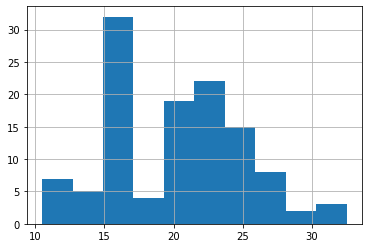

In [38]:
fe_2008.hist()
print(f"Median: {fe_2008.median()}")
print(f"Mean: {fe_2008.mean()}")

Median: 21.0
Mean: 20.22222222222222


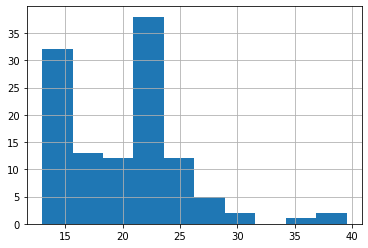

In [39]:
fe_1999.hist()
print(f"Median: {fe_1999.median()}")
print(f"Mean: {fe_1999.mean()}")

Assumptions:

    1. Normal: YES
    2. Independent: YES
    3. Variance: Close

In [26]:
fe_1999.var()

27.122605363984682

In [27]:
fe_2008.var()

24.097480106100797

In [28]:
t, p = stats.ttest_ind(fe_1999, fe_2008, equal_var = True)
t, p

(0.21960177245940962, 0.8263744040323578)

In [29]:
p < alpha


False

Fail to Reject null hypothesis - mpg between years is not significantly different

In [31]:
stats.kruskal(fe_1999, fe_2008)

KruskalResult(statistic=0.10300393353208691, pvalue=0.7482541485808683)

#### Are compact cars more fuel-efficient than the average car?

In [34]:
mpg.columns

Index(['manufacturer', 'model', 'displ', 'year', 'cyl', 'trans', 'drv', 'cty',
       'hwy', 'fl', 'class', 'avg_mpg'],
      dtype='object')

Comparing observed mean to the theoretic one - one sample t test. A one-tailed test looks for a specific difference: appropriate if I only want to determine if there is a difference between groups in a specific direction, positive only or negative only. Here I'm looking for whether subset mean (compact) is greater than overall mean, so evaluate p/2 < a and t > 0

H0: compact cars are no different in fuel efficiency as the average <br>
Ha: compact cars are more efficient than the average car

Assumptions:

    1. Normal: YES
    2. Independent: YES, or are they? Compact cars are subset of all
    3. Variance: Quite different

In [35]:
compact = mpg[mpg['class'] == 'compact'].avg_mpg


In [36]:
compact.var()

12.442876965772433

In [37]:
mpg.avg_mpg.var()

25.50542900113715

In [62]:
t, p = stats.ttest_1samp(compact, mpg.avg_mpg.mean())

2.0992818971585668e-10


In [65]:
print(f'The t-statistic for the one sample t-test comparing compact car mpg to overall mpg is {round(t,3)}.')
print(f'The t-statistic is greater than 0: {round(t,3)>0}.')
print(f'Our p-value/2 is {round(p/2, 5)}.')
print(f'Our p-value/2 is less than our alpha ({alpha}): {p/2 < alpha}')
if p/2 > alpha:
    print("We fail to reject $H_{0}$")
elif t < 0:
    print("We fail to reject $H_{0}$")
else:
    print("We reject $H_{0}$")


The t-statistic for the one sample t-test comparing compact car mpg to overall mpg is 7.897.
The t-statistic is greater than 0: True.
Our p-value/2 is 0.0.
Our p-value/2 is less than our alpha (0.05): True
We reject $H_{0}$


#### Do manual cars get better gas mileage than automatic cars?

This is comparing the means of two different groups - independent t-test, 1 tail, significantly larger

In [81]:
manual = mpg[mpg.trans.str.contains('manual')].avg_mpg
automatic = mpg[mpg.trans.str.contains('auto')].avg_mpg

H0 = gas mileage is the same between manual and automatic cars <br>
Ha = manual cars get better gas mileage than automatic cars

Manual var: 26.635167464114826, median: 22.0, mean: 22.227272727272727


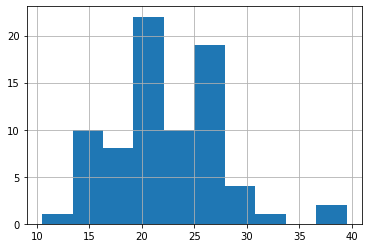

In [82]:
manual.hist()
print(f"Manual var: {manual.var()}, median: {manual.median()}, mean: {manual.mean()}")

Automatic var: 21.942777233382337, median: 19.0, mean: 19.130573248407643


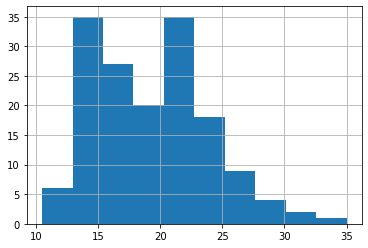

In [83]:
automatic.hist()
print(f"Automatic var: {automatic.var()}, median: {automatic.median()}, mean: {automatic.mean()}")

Assumptions:

    1. Normal: YES
    2. Independent: YES
    3. Variance: different

In [85]:
t, p = stats.ttest_ind(manual, automatic, equal_var=False)

t, p/2

(4.443514012903071, 8.976124499958965e-06)

In [86]:
print("is p/2 < alpha? ", p / 2 < alpha)
print("is t > 0? ", t > 0)
if p / 2 > alpha:
    print("We fail to reject $H_{0}$")
elif t < 0:
    print("We fail to reject $H_{0}$")
else:
    print("We reject $H_{0}$")


is p/2 < alpha?  True
is t > 0?  True
We reject $H_{0}$


This means manual cars do have higher mpg on average than automatic cars

### Correlation Exercises

1. Telco Churn: Does tenure correlate with monthly charges?

Total charges? 

What happens if you control for phone and internet service?

2. Use Employees: Is there a relationship between how long an employee has been with the company and their salary?

In [104]:
sql = """SELECT * FROM employees JOIN salaries USING (emp_no);"""
emp_sal = pd.read_sql(sql, get_db_url('employees'))

Is there a relationship between how long an employee has been with the company and the number of titles they have had?